In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.stats.stats import pearsonr
from sklearn.cluster import KMeans
import pandas as pd
from collections import Counter
import seaborn as sns

# Get data

In [2]:
data_array = pd.read_csv('Bank.csv',delimiter=',')

In [3]:
data_array

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
del data_array["ID"]
del data_array["ZIP Code"]
data_array

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


# Correlation

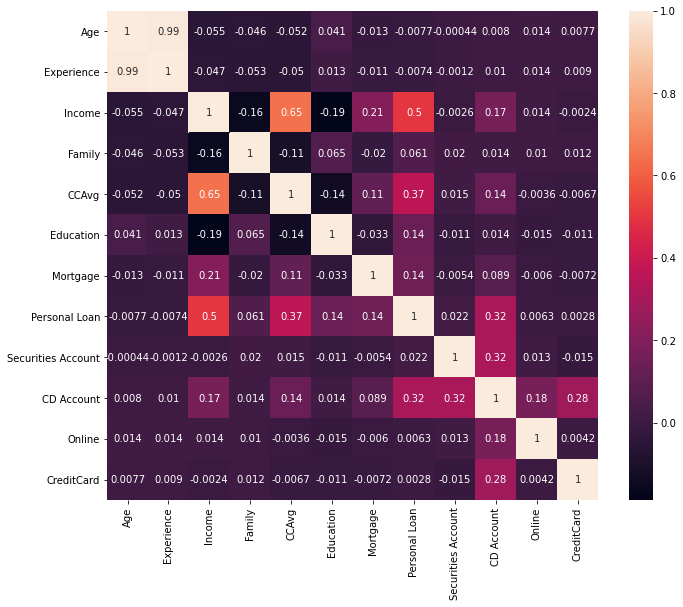

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
Experience           -0.007413
Age                  -0.007726
Name: Personal Loan, dtype: float64

In [5]:
fig, ax = plt.subplots(figsize=(11,9))
correl = data_array.corr()
sns.heatmap(correl,annot=True)
plt.show()
correl["Personal Loan"].sort_values(ascending=False)

In [6]:
del data_array["Family"]
del data_array["Securities Account"]
del data_array["Online"]
del data_array["CreditCard"]
del data_array["Experience"]
del data_array["Age"]
data_array

,Income,CCAvg,Education,Mortgage,Personal Loan,CD Account
0,49,1.6,1,0,0,0
1,34,1.5,1,0,0,0
2,11,1.0,1,0,0,0
3,100,2.7,2,0,0,0
4,45,1.0,2,0,0,0
...,...,...,...,...,...,...
4995,40,1.9,3,0,0,0
4996,15,0.4,1,85,0,0
4997,24,0.3,3,0,0,0
4998,49,0.5,2,0,0,0


# Distribution of data

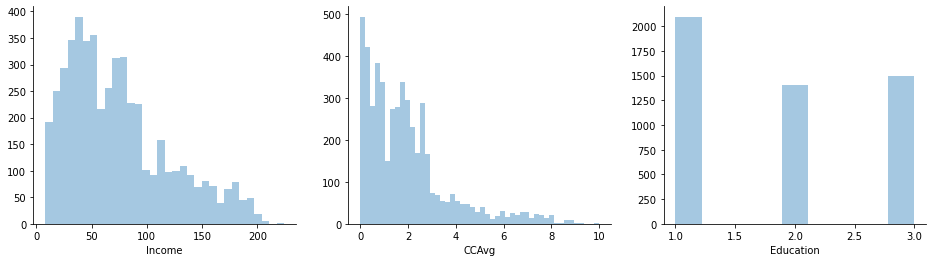

In [7]:
variables=["Income", "CCAvg", "Education"]
fig, ax = plt.subplots(figsize=(16,4))
for i in range(len(variables)):
    plt.subplot(1,3,i+1)
    x=data_array[variables[i]]
    sns.distplot(x, kde=False)
    sns.despine()

# Scale

In [8]:
variables=["Income", "CCAvg", "Education", "Mortgage", "CD Account"]
scaler = StandardScaler()
data_array[variables] = scaler.fit_transform(data_array[variables])
data_array

,Income,CCAvg,Education,Mortgage,Personal Loan,CD Account
0,-0.538229,-0.193385,-1.049078,-0.555524,0,-0.25354
1,-0.864109,-0.250611,-1.049078,-0.555524,0,-0.25354
2,-1.363793,-0.536736,-1.049078,-0.555524,0,-0.25354
3,0.569765,0.436091,0.141703,-0.555524,0,-0.25354
4,-0.625130,-0.536736,0.141703,-0.555524,0,-0.25354
...,...,...,...,...,...,...
4995,-0.733757,-0.021710,1.332484,-0.555524,0,-0.25354
4996,-1.276892,-0.880087,-1.049078,0.280238,0,-0.25354
4997,-1.081363,-0.937312,1.332484,-0.555524,0,-0.25354
4998,-0.538229,-0.822862,0.141703,-0.555524,0,-0.25354


# Learning and predicting

In [9]:
data_without_y = data_array.copy()
del data_without_y["Personal Loan"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data_without_y,     
                                                    data_array['Personal Loan'].values, 
                                                    train_size=0.5)

In [11]:
kmeans = KMeans(n_clusters=2).fit(x_train)
y_pred=kmeans.predict(x_test)
if (accuracy_score(y_test, y_pred)<0.5):
    y_pred=[abs(1-y_pred[i]) for i in range(len(y_pred))]
pd.DataFrame({"true":y_test, "pred":y_pred})

,true,pred
0,1,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
2495,0,0
2496,0,0
2497,0,0
2498,1,1


In [12]:
accuracy_score(y_test, y_pred)

0.8512